In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to change default colormap
plt.rcParams["image.cmap"] = "Accent"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Accent.colors)

In [250]:
cpr_reordered_sktch_10k = pd.read_csv('./reordered_10k_updated.csv',header = None, names=['size_byte','batch'], index_col='batch')
species_list = ["s_pneumoniae", "c_jejuni", "e_coli", 'm_tuber','s_aureus', 's_enterica']
original_sizes = [726682524, 241377816, 4301631272, 1282607124, 468444344, 4604082684]
no_genomes = [51433, 28336, 89136, 49020, 47997, 178585]

In [213]:
index = [i[:-7] for i in cpr_reordered_sktch_10k.index]
cpr_reordered_sktch_10k.index = index
set(cpr_reordered_sktch_10k.index[:-10])

{' e_coli_0.1_cut_point_placement_order__16',
 ' s_aureus_0.99_cut_point_placement_order__10',
 ' m_tuber_0.005_cut_point_placement_order__00',
 ' s_enterica_0.01_cut_point_placement_order__15',
 ' s_enterica_0.05_cut_point_placement_order__05',
 ' e_coli_0.05_cut_point_placement_order__19',
 ' s_pneumoniae_0.5_cut_point_placement_order__07',
 ' e_coli_0.01_cut_point_placement_order__07',
 ' s_enterica_0.3_cut_point_placement_order__40',
 ' e_coli_0.01_cut_point_placement_order__17',
 ' s_enterica_0.001_cut_point_placement_order__22',
 ' s_enterica_0.0025_cut_point_placement_order__04',
 ' s_enterica_0.025_cut_point_placement_order__41',
 ' e_coli_0.005_cut_point_placement_order__18',
 ' e_coli_0.1_cut_point_placement_order__17',
 ' s_enterica_0.025_cut_point_placement_order__21',
 ' s_enterica_0.05_cut_point_placement_order__01',
 ' e_coli_0.001_cut_point_placement_order__18',
 ' s_enterica_0.001_cut_point_placement_order__15',
 ' e_coli_0.25_cut_point_placement_order__09',
 ' m_tuber

In [214]:
s_enterica = cpr_reordered_sktch_10k[cpr_reordered_sktch_10k.index.str.contains('s_enterica', na=False)]
s_enterica['size_byte'].head(100)

s_enterica_0.001_cut_point_placement_order__00    76037972
s_enterica_0.001_cut_point_placement_order__01    64655248
s_enterica_0.001_cut_point_placement_order__02    70843352
s_enterica_0.001_cut_point_placement_order__03    51902764
s_enterica_0.001_cut_point_placement_order__04    52391752
                                                    ...   
s_enterica_0.005_cut_point_placement_order__05    83592168
s_enterica_0.005_cut_point_placement_order__06    88431904
s_enterica_0.005_cut_point_placement_order__07    80824568
s_enterica_0.005_cut_point_placement_order__08    40355632
s_enterica_0.005_cut_point_placement_order__09    60873180
Name: size_byte, Length: 100, dtype: int64

In [215]:
species = 'm_tuber'
fractions = ['0.001','0.0025', '0.005', '0.01','0.025', '0.05', '0.1','0.25','0.5', '0.99']
compression_results = []
for fr in fractions:
    # filter by index (batch)
    mask = cpr_reordered_sktch_10k.index.str.contains(f"{species}_{fr}", na=False)
    res_sum = cpr_reordered_sktch_10k.loc[mask, "size_byte"].sum()

    print(fr, res_sum)
    compression_results.append(res_sum)

print("Final results:", compression_results)

0.001 1397093448
0.0025 1370218056
0.005 1334475296
0.01 1331323496
0.025 1310591924
0.05 1269068104
0.1 1224051344
0.25 1172186872
0.5 1126386892
0.99 1087686612
Final results: [1397093448, 1370218056, 1334475296, 1331323496, 1310591924, 1269068104, 1224051344, 1172186872, 1126386892, 1087686612]


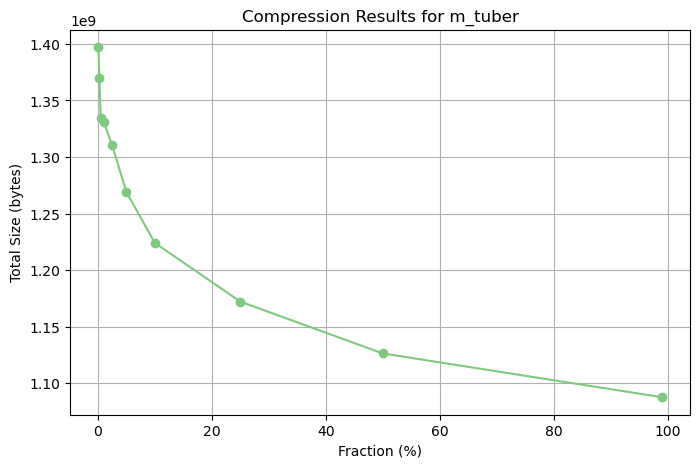

In [216]:
# Fractions (x-axis) and compression_results (y-axis) should already be defined
fractions_float = [float(fr) * 100 for fr in fractions]

plt.figure(figsize=(8, 5))
plt.plot(fractions_float, compression_results, marker="o", linestyle="-")

plt.title(f"Compression Results for {species}")
plt.xlabel("Fraction (%)")
plt.ylabel("Total Size (bytes)")
plt.grid(True)
plt.show()

In [217]:
species = 'm_tuber'
fractions = ['0.001','0.0025', '0.005', '0.01','0.025', '0.05', '0.1','0.25','0.5', '0.99']
compression_results = []
for fr in fractions:
    # filter by index (batch)
    mask = cpr_reordered_sktch_10k.index.str.contains(f"{species}_{fr}", na=False)
    res_sum = cpr_reordered_sktch_10k.loc[mask, "size_byte"].sum()

    print(fr, res_sum)
    compression_results.append(res_sum)

print("Final results:", compression_results)

0.001 1397093448
0.0025 1370218056
0.005 1334475296
0.01 1331323496
0.025 1310591924
0.05 1269068104
0.1 1224051344
0.25 1172186872
0.5 1126386892
0.99 1087686612
Final results: [1397093448, 1370218056, 1334475296, 1331323496, 1310591924, 1269068104, 1224051344, 1172186872, 1126386892, 1087686612]


In [218]:
def get_compression_results(species, fractions):
    results = []
    for fr in fractions:
        mask = cpr_reordered_sktch_10k.index.str.contains(f"{species}_{fr}", na=False)
        if mask.any():
            res_sum = cpr_reordered_sktch_10k.loc[mask, "size_byte"].sum()
        else:
            print(f"⚠️ Missing data for {species}_{fr}")
            res_sum = np.nan   # gap in plot
        results.append(res_sum)
    return results

⚠️ Missing data for s_enterica_0.5


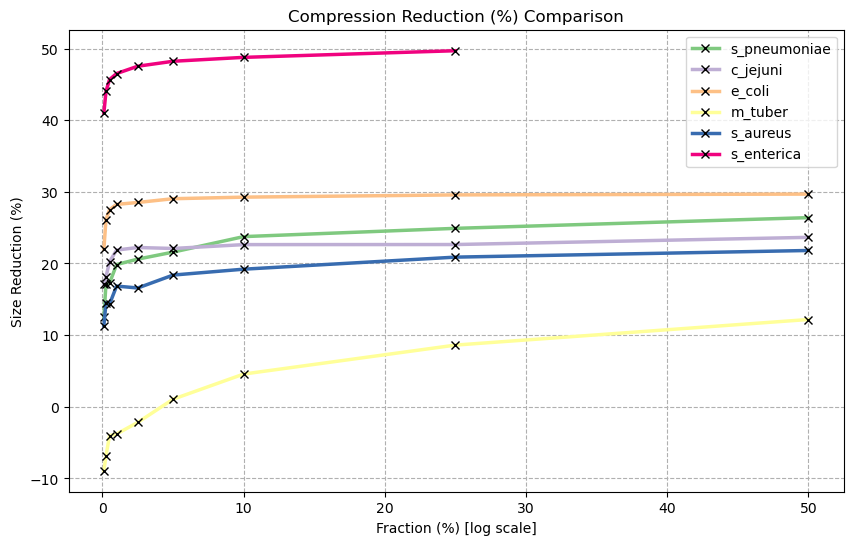

In [220]:
fractions = ['0.001','0.0025', '0.005', '0.01','0.025', '0.05', '0.1','0.25','0.5']
fractions_float = [float(fr) * 100 for fr in fractions]

plt.figure(figsize=(10, 6))

for sp, orig_size in zip(species_list, original_sizes):
    results = get_compression_results(sp, fractions)
    # Compute size reduction percentage
    reduction_pct = [100 * (orig_size - r) / orig_size if not np.isnan(r) else np.nan for r in results]
    plt.plot(fractions_float, reduction_pct, label=sp, marker="x", linewidth=2.5, markersize=6, markeredgecolor="black",markerfacecolor="white")

plt.title("Compression Reduction (%) Comparison")
plt.xlabel("Fraction (%) [log scale]")
plt.ylabel("Size Reduction (%)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

⚠️ Missing data for s_pneumoniae_0.3
⚠️ Missing data for c_jejuni_0.3
⚠️ Missing data for e_coli_0.3
⚠️ Missing data for m_tuber_0.3
⚠️ Missing data for s_aureus_0.3
⚠️ Missing data for s_enterica_0.5


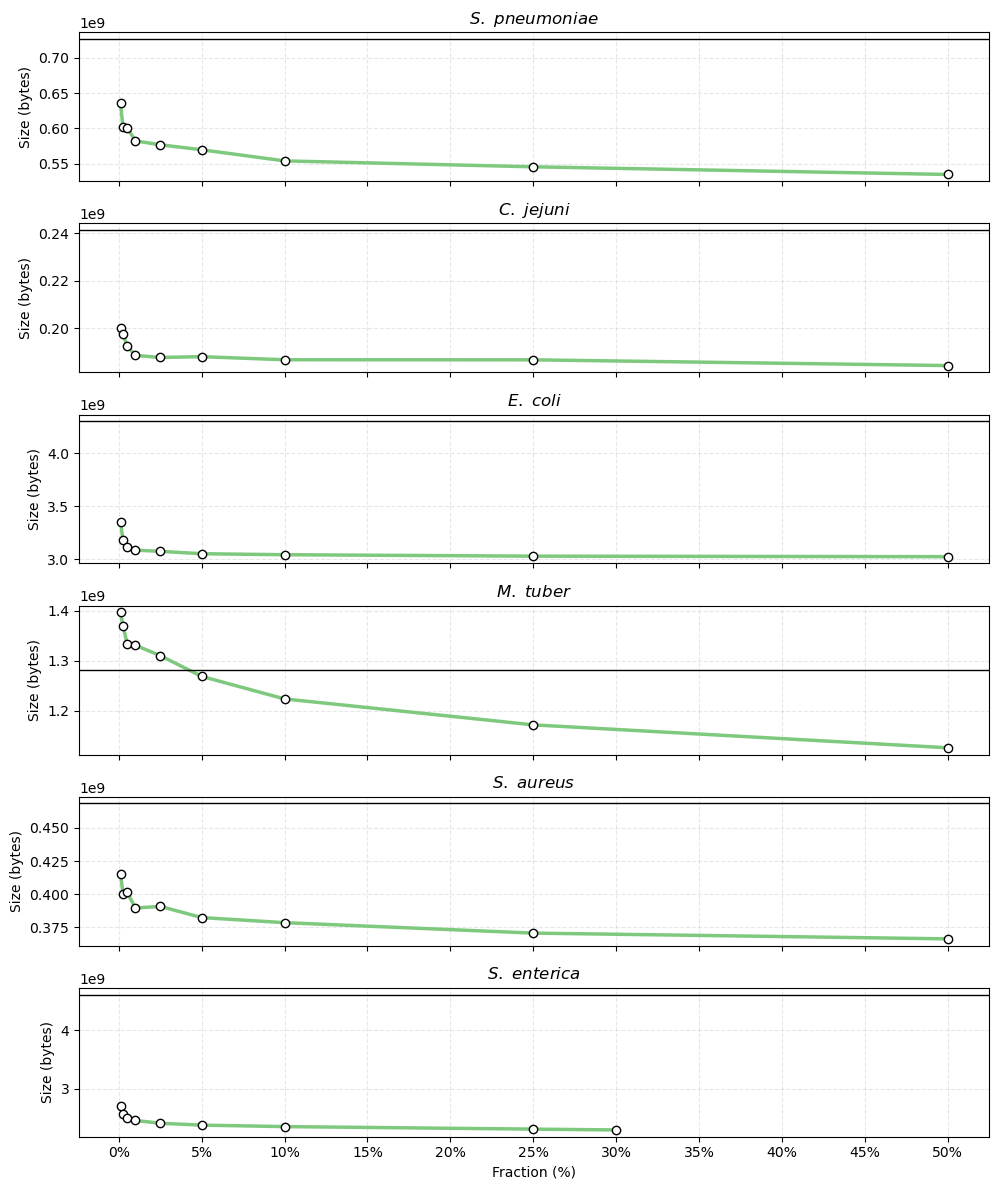

In [221]:
fractions = ['0.001','0.0025', '0.005', '0.01','0.025', '0.05', '0.1','0.25', '0.3','0.5']
fractions_float = [float(fr) * 100 for fr in fractions]

species_labels = [
    r"$\it{S.\ pneumoniae}$", 
    r"$\it{C.\ jejuni}$", 
    r"$\it{E.\ coli}$", 
    r"$\it{M.\ tuber}$",
    r"$\it{S.\ aureus}$", 
    r"$\it{S.\ enterica}$"
]

x_ticks = [0.1, 0.25, 0.5, 1, 2.5, 5, 10, 25, 50, 99]
x_tick_labels = [f"{x}%" for x in x_ticks]
# Create subplots
fig, axes = plt.subplots(len(species_list), 1, figsize=(10, 12), sharex=True)
all_results = []
for ax, sp, og in zip(axes, species_list, original_sizes):
    results = get_compression_results(sp, fractions)
    all_results.extend([og] + list(np.nan_to_num(res)))

    fractions_float = np.array(fractions_float)  # ensure it's numpy for masking
    results = np.array(results)
    # Remove NaN entries
    mask = ~np.isnan(results)
    fractions_clean = fractions_float[mask]
    results_clean = results[mask]

    ax.plot(fractions_clean, results_clean, marker="o", linewidth=2.5, markersize=6, markeredgecolor="black",markerfacecolor="white")

    #original size line for comparison
    ax.axhline(og, color='black', linewidth=1, linestyle='-', label='original size')

ymin, ymax = min(all_results), max(all_results)

for ax, sp in zip(axes,species_labels):
    ax.set_ylabel("Size (bytes)")
    ax.set_title(sp)
    ax.grid(True, ls="--", alpha=0.3)
    ax.ticklabel_format(axis = 'y',scilimits = (9,9))

x_ticks = np.arange(0, 55, 5)  # 0% to 100% in steps of 5%
x_tick_labels = [f"{int(x)}%" for x in x_ticks]

axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels(x_tick_labels)
# Shared x-axis
axes[-1].set_xlabel("Fraction (%)")

plt.tight_layout()
plt.show()

⚠️ Missing data for s_pneumoniae_0.3
⚠️ Missing data for c_jejuni_0.3
⚠️ Missing data for e_coli_0.3
⚠️ Missing data for m_tuber_0.3
⚠️ Missing data for s_aureus_0.3
⚠️ Missing data for s_enterica_0.5


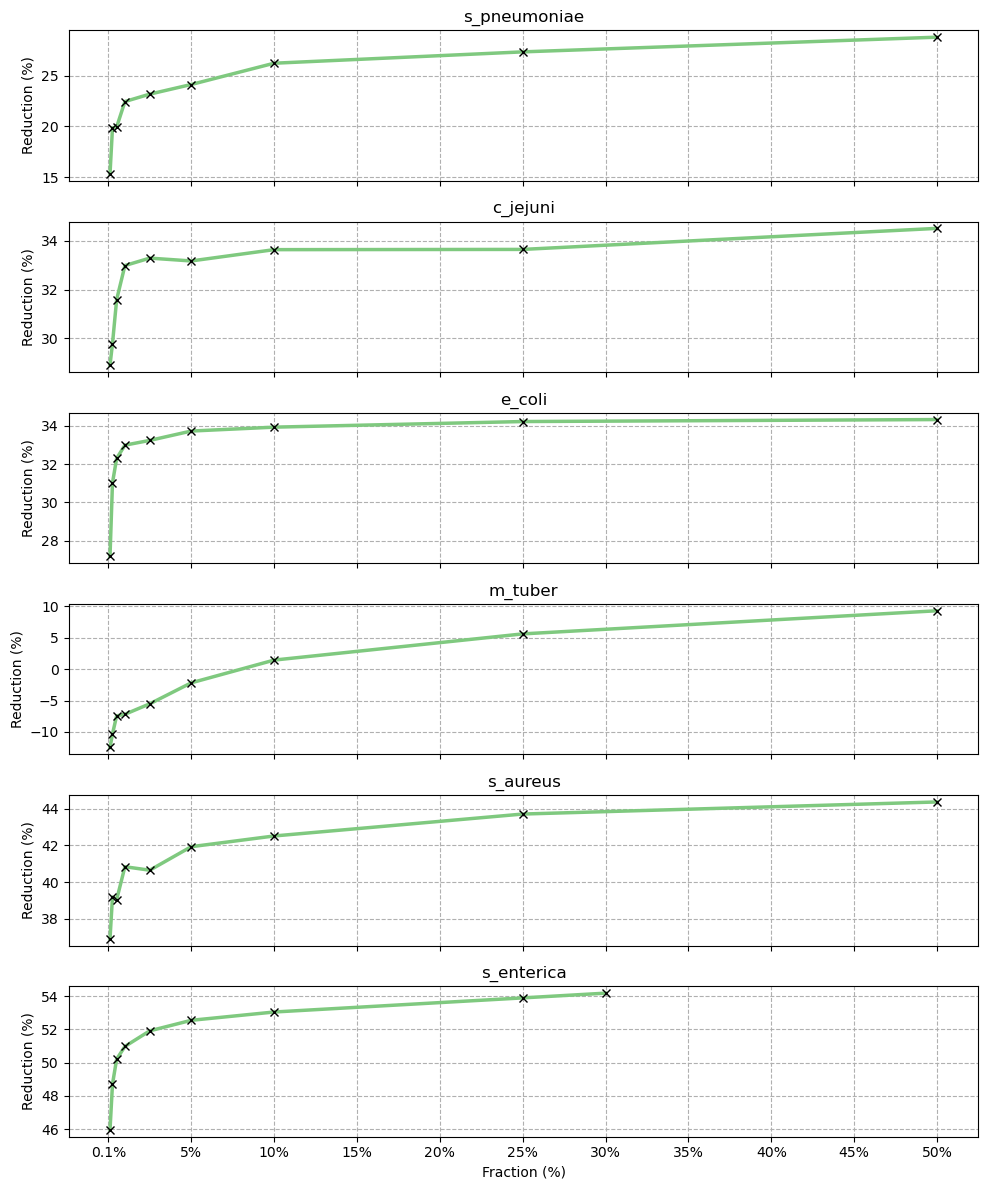

In [200]:
import matplotlib.pyplot as plt
import numpy as np

fractions = ['0.001','0.0025', '0.005', '0.01','0.025', '0.05', '0.1','0.25','0.3','0.5']
fractions_float = [float(fr) * 100 for fr in fractions]

species_list = ["s_pneumoniae", "c_jejuni", "e_coli", 'm_tuber','s_aureus', 's_enterica']
original_sizes = [751005420, 281374108, 4606402364, 1241986216, 658423032, 5024138436]

x_ticks = [0.1, 0.25, 0.5, 1, 2.5, 5, 10, 25, 50, 99]
x_tick_labels = [f"{x}%" for x in x_ticks]

# Create subplots
fig, axes = plt.subplots(len(species_list), 1, figsize=(10, 12), sharex=True)

for ax, sp, orig_size in zip(axes, species_list, original_sizes):
    results = get_compression_results(sp, fractions)

    # Compute size reduction percentage
    reduction_pct = np.array([
        100 * (orig_size - r) / orig_size if not np.isnan(r) else np.nan
        for r in results
    ])

    fractions_float = np.array(fractions_float)  # ensure it's numpy for masking

    # Remove NaN entries
    mask = ~np.isnan(reduction_pct)
    fractions_clean = fractions_float[mask]
    reduction_clean = reduction_pct[mask]
    
    ax.plot(fractions_clean, reduction_clean, marker="x", linewidth=2.5, markersize=6, markeredgecolor="black",markerfacecolor="white")

    ax.set_ylabel("Reduction (%)")
    ax.set_title(sp)
    ax.grid(True, ls="--")

x_ticks = np.arange(0, 55, 5)  # 0% to 100% in steps of 5%
x_tick_labels = [f"{int(x)}%" for x in x_ticks]
x_tick_labels = ['0.1%']+x_tick_labels[1:]

axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels(x_tick_labels)
# Shared x-axis
axes[-1].set_xlabel("Fraction (%)")

plt.tight_layout()
plt.show()

⚠️ Missing data for s_pneumoniae_0.3
⚠️ Missing data for c_jejuni_0.3
⚠️ Missing data for e_coli_0.3
⚠️ Missing data for m_tuber_0.3
⚠️ Missing data for s_aureus_0.3
⚠️ Missing data for s_enterica_0.5
⚠️ Missing data for s_enterica_0.99


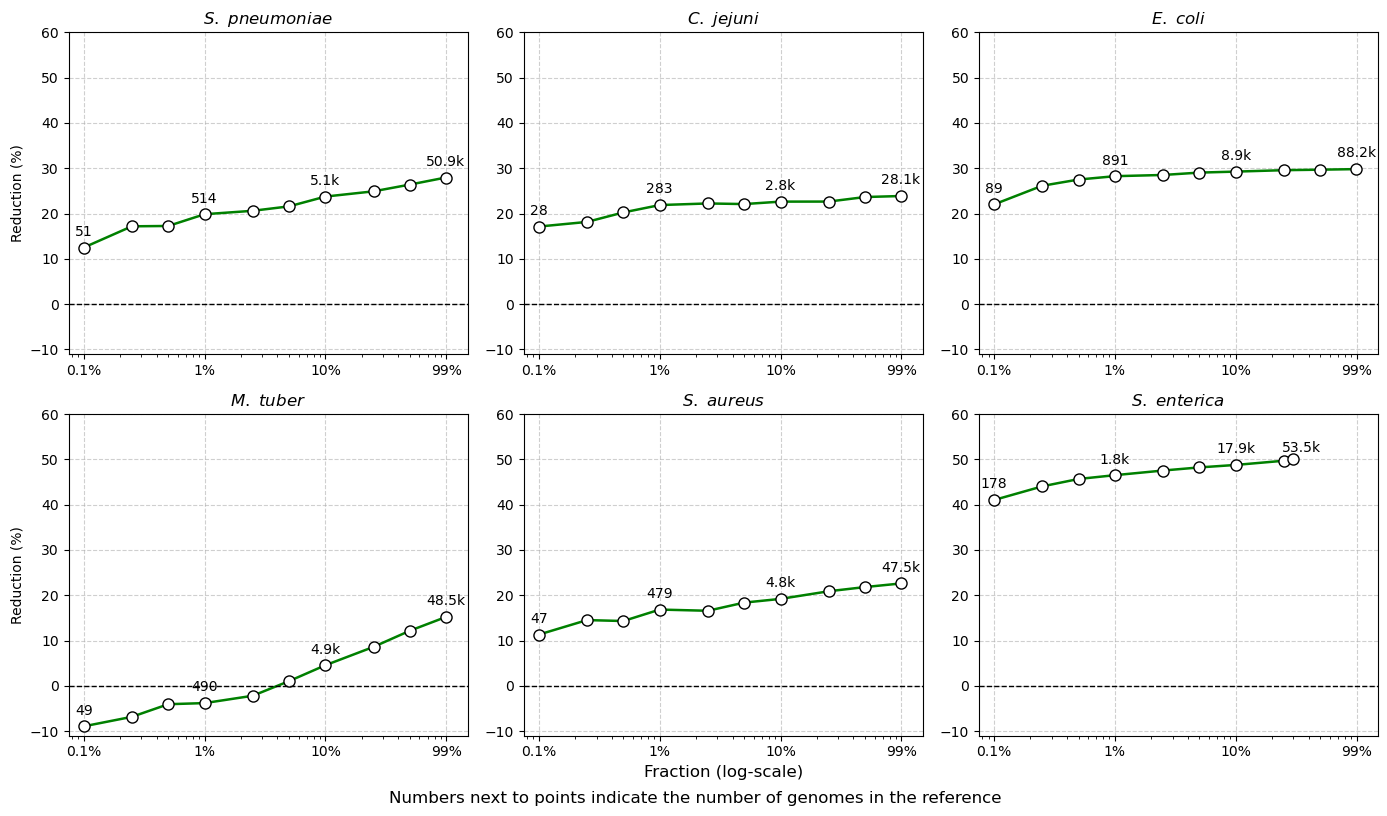

In [299]:
def format_genomes(n):
    if n >= 1_000_000:
        return f"{n/1_000_000:.1f}M"
    elif n >= 1_000:
        return f"{n/1_000:.1f}k"
    else:
        return str(int(n))

fractions = ['0.001','0.0025', '0.005', '0.01','0.025', '0.05', '0.1','0.25','0.3','0.5', '0.99']
fractions_float = [float(fr) * 100 for fr in fractions]

species_labels = [
    r"$\it{S.\ pneumoniae}$", 
    r"$\it{C.\ jejuni}$", 
    r"$\it{E.\ coli}$", 
    r"$\it{M.\ tuber}$",
    r"$\it{S.\ aureus}$", 
    r"$\it{S.\ enterica}$"
]

# Fractions where we want annotations
annot_fractions = [0.1, 1, 10, 99]

# 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharex=False)
axes = axes.flatten()

for ax, sp, orig_size, sp_label, total_genomes in zip(axes, species_list, original_sizes, species_labels, no_genomes):
    results = get_compression_results(sp, fractions)

    # Compute size reduction percentage
    reduction_pct = np.array([
        100 * (orig_size - r) / orig_size if not np.isnan(r) else np.nan
        for r in results
    ])

    fractions_float = np.array(fractions_float)

    # Remove NaN entries
    mask = ~np.isnan(reduction_pct)
    fractions_clean = fractions_float[mask]
    reduction_clean = reduction_pct[mask]
    
    ax.plot(fractions_clean, reduction_clean, marker="o", color="green",
            linewidth=1.8, markersize=8, markeredgecolor="black", 
            markerfacecolor="white", label="Data + Fit")

    # Add genome annotations
    for f in annot_fractions:
        if f in fractions_clean:  # only annotate if fraction exists in data
            idx = np.where(fractions_clean == f)[0][0]
            n_val = int(total_genomes * (f / 100))  # number of genomes
            label = format_genomes(n_val)
            ax.text(fractions_clean[idx], reduction_clean[idx] + 5,  # position below point
                    label, ha="center", va="top", fontsize=10, rotation=0)
    
    ax.set_title(sp_label, fontsize=12)
    ax.set_ylim(-11, 60)
 
    ax.grid(True, ls="--", alpha=0.6)
    ax.axhline(0, color='black', linewidth=1, linestyle='--')

    # Set log scale for x-axis

    ax.set_xscale("log")
    ax.set_xlim(0.075, 150)
    ax.set_xticks([0.1, 1, 10, 100])
    ax.set_xticklabels(["0.1%", "1%", "10%", "99%"])

# X-axis labels
axes[0].set_ylabel("Reduction (%)", fontsize=10)
axes[-2].set_xlabel("Fraction (log-scale)", fontsize=12)
axes[-3].set_ylabel("Reduction (%)", fontsize=10)
axes[-1].text(35, 54, '53.5k', ha="center", va="top", fontsize=10, rotation=0)

fig.text(0.5, -0.01, 
         "Numbers next to points indicate the number of genomes in the reference", 
         ha="center", fontsize=12)
# Add legend to one subplot
#axes[0].legend(fontsize=9, frameon=False)

plt.tight_layout()
plt.show()

⚠️ Missing data for s_pneumoniae_0.3
⚠️ Missing data for c_jejuni_0.3
⚠️ Missing data for e_coli_0.3
⚠️ Missing data for m_tuber_0.3
⚠️ Missing data for s_aureus_0.3
⚠️ Missing data for s_enterica_0.5


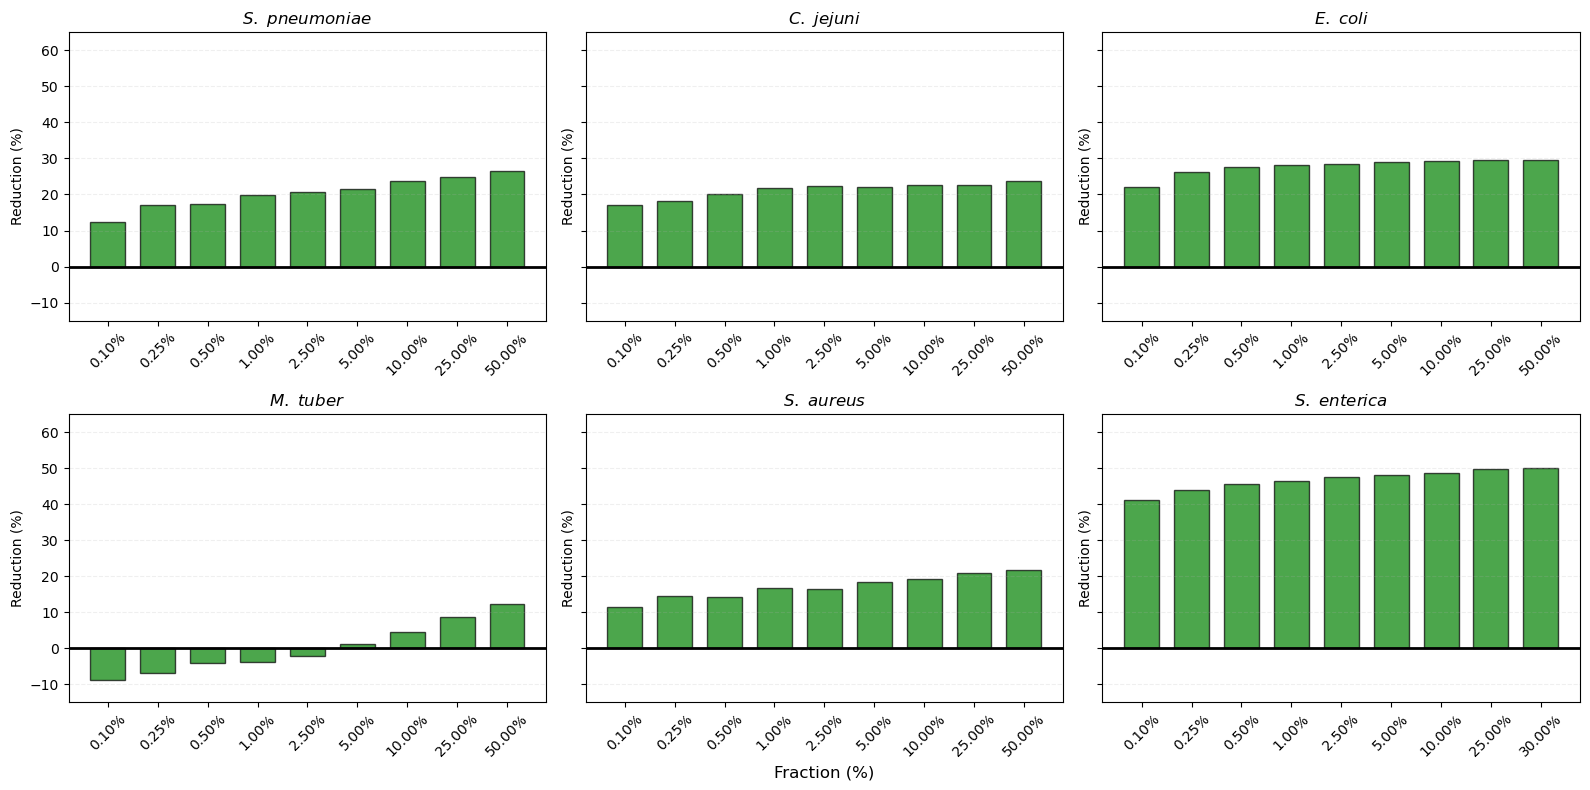

In [224]:
fractions = ['0.001','0.0025', '0.005', '0.01','0.025', '0.05', '0.1','0.25','0.3','0.5']
fractions_float = [float(fr) * 100 for fr in fractions]

species_labels = [
    r"$\it{S.\ pneumoniae}$", 
    r"$\it{C.\ jejuni}$", 
    r"$\it{E.\ coli}$", 
    r"$\it{M.\ tuber}$",
    r"$\it{S.\ aureus}$", 
    r"$\it{S.\ enterica}$"
]

# 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharey=True)
axes = axes.flatten()

for ax, sp, sp_label, orig_size in zip(axes, species_list, species_labels, original_sizes):
    results = get_compression_results(sp, fractions)

    # Compute size reduction percentage
    reduction_pct = np.array([
        100 * (orig_size - r) / orig_size if not np.isnan(r) else np.nan
        for r in results
    ])

    # Remove NaN entries
    mask = ~np.isnan(reduction_pct)
    fractions_clean = np.array(fractions_float)[mask]
    reduction_clean = reduction_pct[mask]

    # Even bar positions
    x_pos = np.arange(len(fractions_clean))

    # Bar plot
    ax.bar(x_pos, reduction_clean, width=0.7, color="green", alpha=0.7, edgecolor="black")
    
    ax.set_title(sp_label, fontsize=12)
    ax.set_ylabel("Reduction (%)", fontsize=10)
    ax.grid(True, ls="--", alpha=0.2, axis="y")

    ax.axhline(0, color='black', linewidth=2, linestyle='-')

    # X-axis ticks (evenly spaced, labeled with fractions %)
    ax.set_xticks(x_pos)
    ax.set_xticklabels([f"{f:.2f}%" for f in fractions_clean], rotation=45)
    ax.set_ylim([-15, 65])

# Shared X label
axes[-2].set_xlabel("Fraction (%)", fontsize=12)
#axes[-1].set_xlabel("Fraction (%)", fontsize=12)

plt.tight_layout()
plt.show()